# Export Beergame Scenarios

This file is used to export scenarios to Microsoft Excel, as a basis for creating interactive dashboads in apps such as PowerBI. You can see an example dashboard below, please download the corresponding PowerBI desktop file from our website.

The Excel file itself is saved in a directory named _export_, which you will need to create if it does not exist.

In [1]:
from BPTK_Py.bptk import bptk 
bptk = bptk()

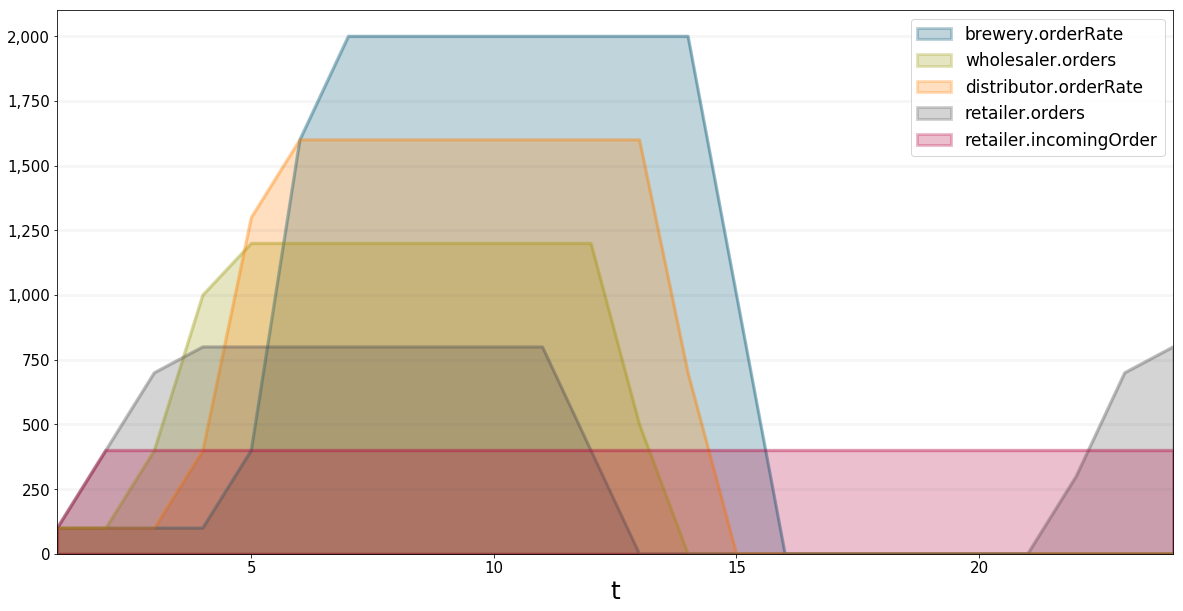

In [2]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    scenarios=["ignoreBackorders"],
    equations=["brewery.orderRate","wholesaler.orders","distributor.orderRate","retailer.orders","retailer.incomingOrder"]
)

In [3]:
bptk.register_scenarios(scenario_manager="smBeergameSD",scenarios=
                          
                          {
                              "interactiveScenario":
                              {
                                   "constants":{
                                            "policySettings.steadyStateOn":0,
                                            "policySettings.sophisticatedOrderDecisionOn":1,
                                            "policySettings.weightingOpenOrders":1,
                                            "policySettings.stockAdjustmentTime":8 
                                   }
                              }
                          }

)

In [4]:
bptk.scenario_manager_factory.scenario_managers["smBeergameSD"].scenarios

{'typical': <BPTK_Py.scenariomanager.scenario.SimulationScenario at 0x11427df28>,
 'ignoreBackorders': <BPTK_Py.scenariomanager.scenario.SimulationScenario at 0x11427da20>,
 'incudeSupplyLine': <BPTK_Py.scenariomanager.scenario.SimulationScenario at 0x11427dfd0>,
 'slowStockAdjustmentTime': <BPTK_Py.scenariomanager.scenario.SimulationScenario at 0x11427d4a8>,
 'interactiveScenario': <BPTK_Py.scenariomanager.scenario.SimulationScenario at 0x1d504bd30>}

In [5]:
import os
export_filename= os.path.join(os.getcwd(),"export","beergame.xlsx")

In [8]:
%%time
bptk.export_scenarios(
    scenario_manager="smBeergameSD",
    equations=[
        "brewery.orderRate",
        "wholesaler.orders",
        "distributor.orderRate",
        "retailer.orders",
        "retailer.incomingOrder",
        "brewery.surplus",
        "wholesaler.surplus",
        "distributor.surplus",
        "retailer.surplus",
        "retailer.cost",
        "performanceControlling.retailerCostAcc",
        "performanceControlling.supplyChainCostAcc",
        "policySettings.targetSupplyChainCost",
        "policySettings.targetRetailerCost",
        "policySettings.targetSurplus"
    ],
    filename=export_filename,
    interactive_scenario="interactiveScenario",
    interactive_equations=[
        "wholesaler.surplus",
        "distributor.surplus",
        "retailer.surplus",
        "brewery.surplus",
        "brewery.orderRate",
        "wholesaler.orders",
        "distributor.orderRate",
        "retailer.cost",
        "retailer.orders",
        "retailer.incomingOrder",
        "performanceControlling.retailerCostAcc",
        "performanceControlling.supplyChainCostAcc",
        "policySettings.targetSupplyChainCost",
        "policySettings.targetRetailerCost",
        "policySettings.targetSurplus"
    ],
    interactive_settings= {
        "policySettings.sophisticatedOrderDecisionOn":(0,2,1),
        "policySettings.weightingOpenOrders":(0,2,1),
        "policySettings.stockAdjustmentTime":(1,17,1)
    }
)

CPU times: user 6.38 s, sys: 140 ms, total: 6.52 s
Wall time: 6.49 s
